**Step 1: Importing Required Libraries**

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Step 2: Load Dataset**

In [4]:
# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Display first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


***Step 3: Data Preprocessing***

In [5]:

# Drop unnecessary columns (like 'customerID' which doesn't affect churn)
df.drop(columns=['customerID'], inplace=True)

# Convert categorical columns to numerical using Label Encoding
label_enc = LabelEncoder()
df['Churn'] = label_enc.fit_transform(df['Churn'])  # 'Yes' -> 1, 'No' -> 0

# Convert categorical variables with multiple classes using One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

# Handle missing values
df = df.fillna(df.median())

**Step 4: Data Splitting**

In [6]:
# Define features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 5: Feature Scaling**

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 6: Model Training**

In [8]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Step 7: Model Evaluation**

In [9]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.80
Confusion Matrix:
 [[959  77]
 [205 168]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.69      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409



**Step 8: Feature Importance**

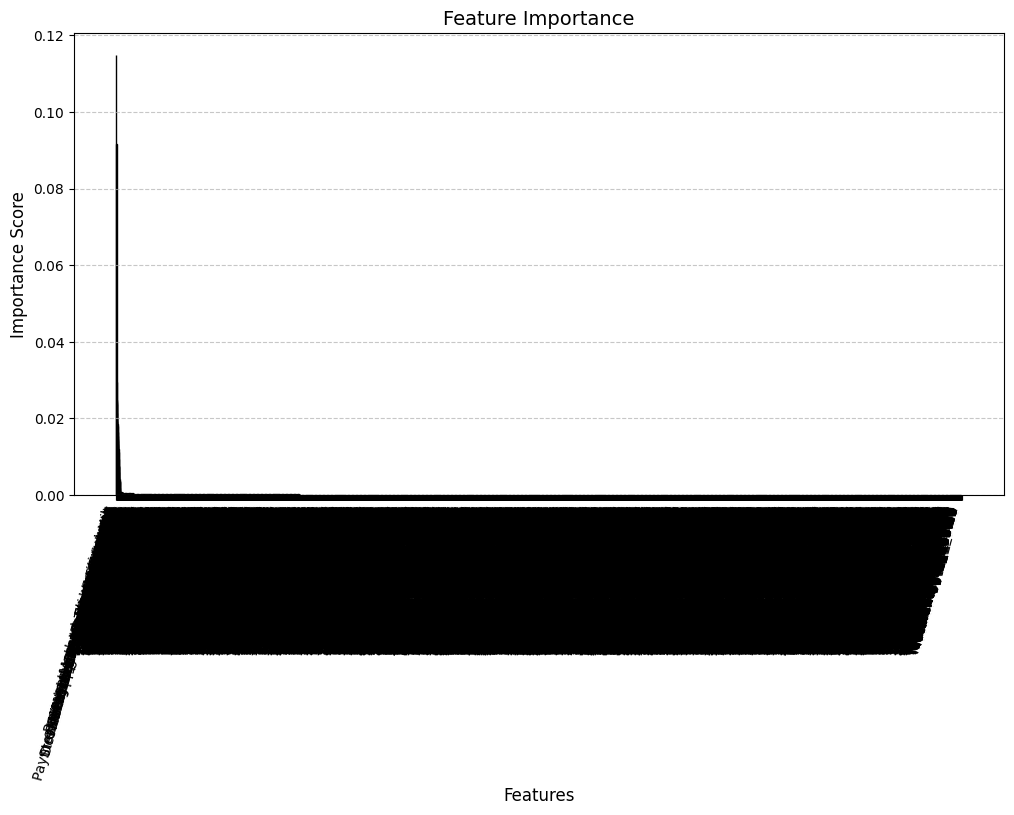

In [21]:
# Get feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(12, 6))  # Slightly wider for better label spacing
plt.title("Feature Importance", fontsize=14)

# Plot bar chart with colors
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align="center", color="royalblue", edgecolor="black")

# Improve x-axis labels
plt.xticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx], rotation=75, ha="right", fontsize=10)

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.show()
